In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#importing dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PEMalware.csv")
df

Mounted at /content/drive


,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [ ]:
new_df = df.drop(['Name', 'Machine', 'TimeDateStamp'], axis=1)

<Axes: >

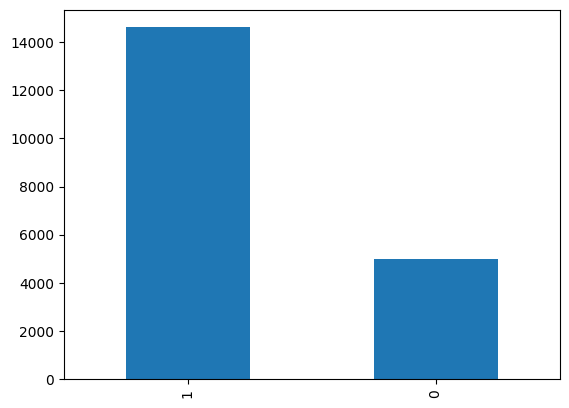

In [ ]:
new_df['Malware'].value_counts().plot.bar()

In [ ]:
new_df['Malware'].value_counts()

1    14599
0     5012
Name: Malware, dtype: int64

In [ ]:
target_name = 'Malware'
data_target = new_df['Malware']
data = new_df.drop(['Malware'], axis=1)
print("data shape: {}".format(data.shape))

data shape: (19611, 75)


In [ ]:
from sklearn.model_selection import train_test_split

def data_split(data, data_target):
  X,X_test,Y,y_test= train_test_split(data, data_target,test_size=0.2, shuffle = True, random_state = 0)
  X_train,X_val,y_train,y_val = train_test_split(X, Y,test_size=0.1, shuffle = True, random_state = 0)
  print("X_train shape: {}".format(X_train.shape), "y_train shape: {}".format(y_train.shape))
  print("X_val shape: {}".format(X_val.shape), "y_val shape: {}".format(y_val.shape))
  print("X_test shape: {}".format(X_test.shape), "y_test shape: {}".format(y_test.shape))
  return X_train,X_val,X_test,y_train,y_val,y_test

X_train,X_val,X_test,y_train,y_val,y_test = data_split(data, data_target)

X_train shape: (14119, 75) y_train shape: (14119,)
X_val shape: (1569, 75) y_val shape: (1569,)
X_test shape: (3923, 75) y_test shape: (3923,)


In [ ]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(
    # Set the number of trees to 100
    n_estimators=50,
    # Set the random state to 0 to ensure reproducibility
    random_state=0,
    # Enable the out-of-bag (OOB) score
    oob_score = True,
    # Set the maximum depth of the trees to 16
    max_depth = 5)

# Fit the classifier to the training data
random_forest.fit(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Train Accuracy: ", acc_random_forest)

y_pred_val_randomforest = random_forest.predict(X_val)
accuracy_val_randomforest = accuracy_score(y_val,y_pred_val_randomforest)
print("Validation Accuracy: ", accuracy_val_randomforest)

y_pred_test_randomforest = random_forest.predict(X_test)
accuracy_test_randomforest = accuracy_score(y_test, y_pred_test_randomforest)
print("Test Accuracy: ",accuracy_test_randomforest)

Train Accuracy:  97.7
Validation Accuracy:  0.9770554493307839
Test Accuracy:  0.9762936528167219


In [ ]:
precision_random_forest = precision_score(y_test, y_pred_test_randomforest)
recall_random_forest = recall_score(y_test, y_pred_test_randomforest)
f1_random_forest = f1_score(y_test, y_pred_test_randomforest)

print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)
print("F1-score:", f1_random_forest)

Precision: 0.9732083054253181
Recall: 0.9955464200068517
F1-score: 0.9842506350550381


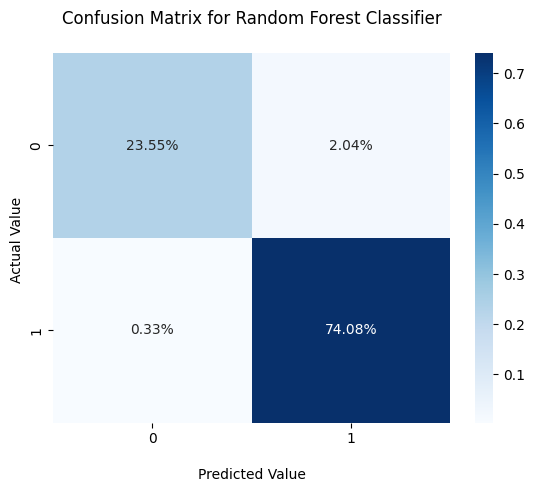

In [ ]:

#Get the confusion matrix
cm_random_forest = confusion_matrix(y_test, y_pred_test_randomforest)

ax = sns.heatmap(cm_random_forest/np.sum(cm_random_forest), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest Classifier\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:

base_estimator = DecisionTreeClassifier(max_depth=3)

# Initialize the AdaBoost classifier
best_adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)


# Initialize the AdaBoost classifier with the best hyperparameters
best_adaboost_classifier = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=50,
    learning_rate=0.001,
    random_state=42
)

# Train the classifier on the training data
best_adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test_adaboost = best_adaboost_classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

acc_train_adaboost_par = round(best_adaboost_classifier.score(X_train, y_train) * 100, 2)
print(acc_train_adaboost_par)
acc_val_adaboost_par = round(best_adaboost_classifier.score(X_val, y_val) * 100, 2)
print(acc_val_adaboost_par)
acc_test_adaboost_par = round(best_adaboost_classifier.score(X_test, y_test) * 100, 2)
print(acc_test_adaboost_par)

precision_ada = precision_score(y_test, y_pred_test_adaboost)
recall_ada = recall_score(y_test, y_pred_test_adaboost)
f1_ada = f1_score(y_test, y_pred_test_adaboost)

print("Precision:", precision_ada)
print("Recall:", recall_ada)
print("F1-score:", f1_ada)



97.0
96.75
97.25
Precision: 0.9686562187395799
Recall: 0.9952038369304557
F1-score: 0.9817505914160188


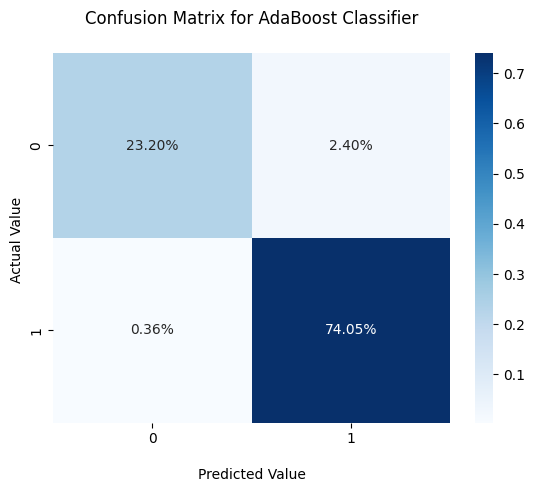

In [ ]:

#Get the confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_test_adaboost)

ax = sns.heatmap(cm_ada/np.sum(cm_ada), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for AdaBoost Classifier\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

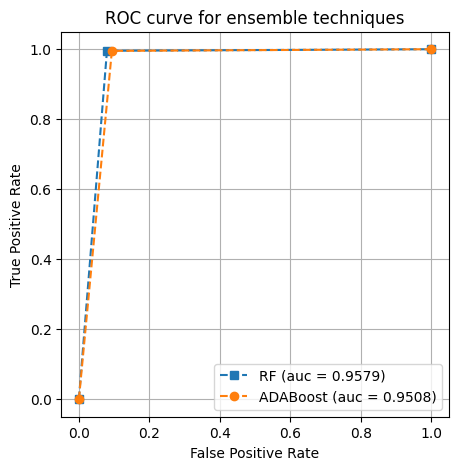

In [ ]:
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_test_randomforest)
auc_rf = auc (rf_fpr, rf_tpr)

adaboost_fpr, adaboost_tpr, threshold = roc_curve(y_test, y_pred_test_adaboost)
auc_adaboost = auc (adaboost_fpr, adaboost_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_fpr, rf_tpr, marker='s',linestyle='--', label='RF (auc = %0.4f)' % auc_rf)
plt.plot(adaboost_fpr, adaboost_tpr, marker='o',linestyle='--', label='ADABoost (auc = %0.4f)' % auc_adaboost)


plt.title('ROC curve for ensemble techniques')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(data, data_target)
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                        Feature  Importance
34  MinorOperatingSystemVersion    0.115475
37        MajorSubsystemVersion    0.081190
33  MajorOperatingSystemVersion    0.065754
30                    ImageBase    0.065105
38        MinorSubsystemVersion    0.063305
..                          ...         ...
60           SectionMinPhysical    0.000000
58        SectionMaxVirtualsize    0.000000
56            SectionMaxRawsize    0.000000
54            SectionMaxEntropy    0.000000
0                       e_magic    0.000000

[75 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [ ]:

model = Sequential()
model.add(Dense(512, input_dim =75, activation ="relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation ="sigmoid"))


In [ ]:
model.compile(loss= "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"] )

In [ ]:
history = model.fit(X_train, y_train,  epochs=100, batch_size=32, shuffle=True, validation_data =(X_test, y_test))

Epoch 1/100
442/442 [==============================] - 6s 8ms/step - loss: 0.1501 - accuracy: 0.9585 - val_loss: 0.1066 - val_accuracy: 0.9664
Epoch 2/100
442/442 [==============================] - 5s 12ms/step - loss: 0.0921 - accuracy: 0.9723 - val_loss: 0.1054 - val_accuracy: 0.9674
Epoch 3/100
442/442 [==============================] - 3s 8ms/step - loss: 0.0838 - accuracy: 0.9756 - val_loss: 0.1010 - val_accuracy: 0.9699
Epoch 4/100
442/442 [==============================] - 3s 8ms/step - loss: 0.0781 - accuracy: 0.9773 - val_loss: 0.0962 - val_accuracy: 0.9720
Epoch 5/100
442/442 [==============================] - 4s 8ms/step - loss: 0.0710 - accuracy: 0.9780 - val_loss: 0.0860 - val_accuracy: 0.9750
Epoch 6/100
442/442 [==============================] - 5s 11ms/step - loss: 0.0684 - accuracy: 0.9792 - val_loss: 0.0822 - val_accuracy: 0.9730
Epoch 7/100
442/442 [==============================] - 4s 8ms/step - loss: 0.0617 - accuracy: 0.9798 - val_loss: 0.0950 - val_accuracy: 0.97

In [ ]:
eval_model=model.evaluate(X_train, y_train)
eval_model

442/442 [==============================] - 2s 4ms/step - loss: 0.0254 - accuracy: 0.9926


[0.025373468175530434, 0.9925631880760193]

In [ ]:
y_pred_nn= model.predict(X_test)
y_pred_nn =(y_pred_nn>0.5)
y_pred_nn.shape

123/123 [==============================] - 1s 5ms/step


(3923, 1)

In [ ]:
#Validation or test accuracy average
eval_model_val=model.evaluate(X_val, y_val)
eval_model_val

50/50 [==============================] - 0s 8ms/step - loss: 0.0845 - accuracy: 0.9790


[0.08446316421031952, 0.9789674878120422]

In [ ]:
#Validation or test accuracy average
eval_model_test=model.evaluate(X_test, y_test)
eval_model_test

123/123 [==============================] - 2s 11ms/step - loss: 0.1185 - accuracy: 0.9778


[0.11851229518651962, 0.9778230786323547]

In [ ]:
result = confusion_matrix( y_test , y_pred_nn)
result

array([[ 960,   44],
       [  43, 2876]])

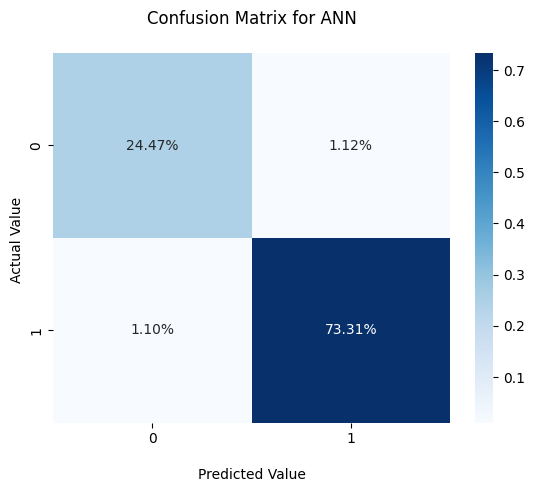

In [43]:

#Get the confusion matrix


ax = sns.heatmap(result/np.sum(result), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for ANN\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score
p_nn = precision_score(y_test, y_pred_nn)
print("Precision:",p_nn)
r_nn = recall_score(y_test, y_pred_nn)
print("Recall:",r_nn)
f1_nn = f1_score(y_test, y_pred_nn)
print("F1-score:",f1_nn)

Precision: 0.9849315068493151
Recall: 0.9852689277149709
F1-score: 0.9851001883884226


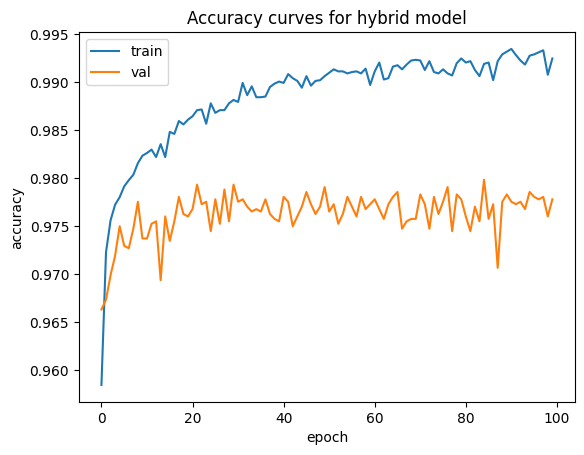

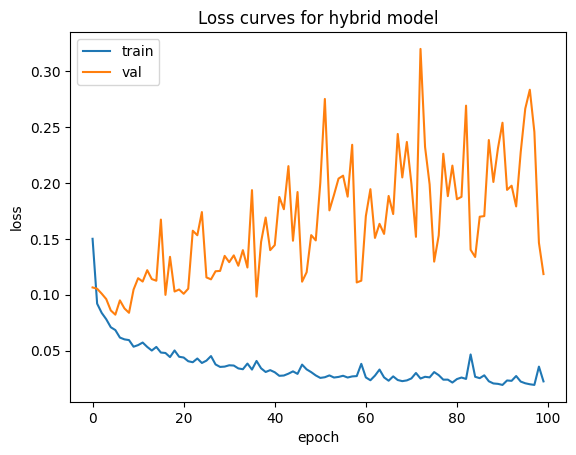

In [ ]:
import keras

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy curves for hybrid model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss curves for hybrid model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

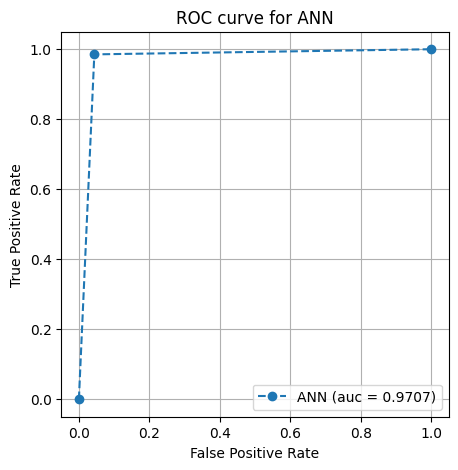

In [ ]:

nn_fpr, nn_tpr, threshold = roc_curve(y_test, y_pred_nn)
auc_nn = auc (nn_fpr, nn_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(nn_fpr, nn_tpr, marker='o',linestyle='--', label='ANN (auc = %0.4f)' % auc_nn)


plt.title('ROC curve for ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
feature_extraction_model = Sequential()
for layer in model.layers[:-1]:  # Exclude the last layer
    feature_extraction_model.add(layer)

# Now feature_extraction_model is the modified model without the last classification layer
feature_extraction_model.summary()
# Use feature_extraction_model to extract features from the data

extracted_features_nn_train = feature_extraction_model.predict(X_train)
extracted_features_nn_val = feature_extraction_model.predict(X_val)
extracted_features_nn_test = feature_extraction_model.predict(X_test)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               38912     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)               

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# Random Forest Classifier for Classification
nn_rf_hybrid = RandomForestClassifier(n_estimators=150, max_depth=16)
nn_rf_hybrid.fit(extracted_features_nn_train, y_train)

acc_nn_rf_hybrid = round(nn_rf_hybrid.score(extracted_features_nn_train, y_train) * 100, 2)
print("Training Accuracy:",acc_nn_rf_hybrid)

val_nn_rf_hybrid = round(nn_rf_hybrid.score(extracted_features_nn_val, y_val) * 100, 2)
print("Validation Accuracy:",val_nn_rf_hybrid)

# Make predictions on the test set
y_pred_rf_hyrbid = nn_rf_hybrid.predict(extracted_features_nn_test)


acc_test_nn_rf_hybrid = round(nn_rf_hybrid.score(extracted_features_nn_test, y_test) * 100, 2)
print("Test Accuracy =", acc_test_nn_rf_hybrid)

p_nn_rf_hybrid = precision_score(y_test, y_pred_rf_hyrbid)
print("Precision:",p_nn_rf_hybrid)
r_nn_rf_hybrid = recall_score(y_test, y_pred_rf_hyrbid)
print("Recall:",r_nn_rf_hybrid)
f1_nn_rf_hybrid = f1_score(y_test, y_pred_rf_hyrbid)
print("F1-score:",f1_nn_rf_hybrid)


Training Accuracy: 99.99
Validation Accuracy: 98.09
Test Accuracy = 97.94
Precision: 0.9846311475409836
Recall: 0.987667009249743
F1-score: 0.9861467419189328


In [ ]:
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=3)

# Initialize the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [ 150],
    'learning_rate': [0.1],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search results
best_params = grid_search.best_params_
print(best_params)

# Initialize the AdaBoost classifier with the best hyperparameters
best_adaboost_classifier = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

# Train the classifier on the training data
best_adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = best_adaboost_classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

{'learning_rate': 0.1, 'n_estimators': 150}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
acc_train_adaboost_par = round(best_adaboost_classifier.score(X_train, y_train) * 100, 2)
print(acc_train_adaboost_par)
acc_val_adaboost_par = round(best_adaboost_classifier.score(X_val, y_val) * 100, 2)
print(acc_val_adaboost_par)
acc_test_adaboost_par = round(best_adaboost_classifier.score(X_test, y_test) * 100, 2)
print(acc_test_adaboost_par)



from sklearn.metrics import precision_score, recall_score, f1_score
p_nn_ada_hybrid = precision_score(y_test, y_pred_ada)
print("Precision:",p_nn_ada_hybrid)
r_nn_ada_hybrid = recall_score(y_test, y_pred_ada)
print("Recall:",r_nn_ada_hybrid)
f1_nn_ada_hybrid = f1_score(y_test, y_pred_ada)
print("F1-score:",f1_nn_ada_hybrid)

99.18
98.79
98.45
Precision: 0.9860544217687075
Recall: 0.9931483384720795
F1-score: 0.9895886670080218


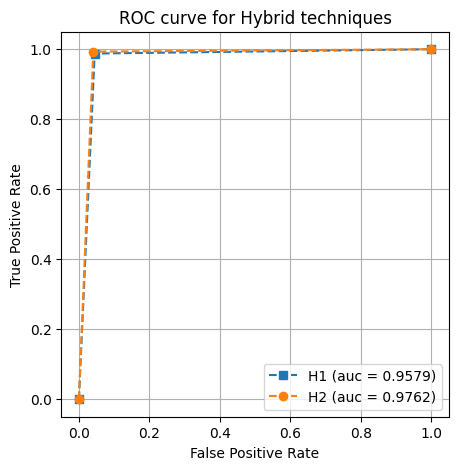

In [ ]:
h1_fpr, h1_tpr, threshold = roc_curve(y_test, y_pred_rf_hyrbid)
auc_h1 = auc (rf_fpr, rf_tpr)

h2_fpr, h2_tpr, threshold = roc_curve(y_test, y_pred_ada)
auc_h2 = auc (h2_fpr, h2_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(h1_fpr, h1_tpr, marker='s',linestyle='--', label='H1 (auc = %0.4f)' % auc_h1)
plt.plot(h2_fpr, h2_tpr, marker='o',linestyle='--', label='H2 (auc = %0.4f)' % auc_h2)


plt.title('ROC curve for Hybrid techniques')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid(True)
plt.show()